<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

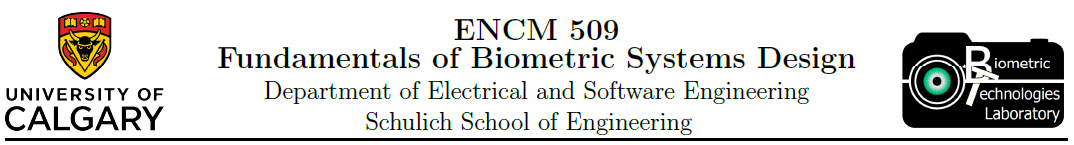

<center>
    <h1>Course Project</h1>
    <h2>SARS Data Bayesian Network</h2>
    <h3>Youssef Abdel Maksoud, 30062891</h3>
</center>

In [1]:
import os, random
import matplotlib.pyplot as plt
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import numpy as np

%matplotlib inline

r_seed = 101

# for reproducibility
# must to run this before create the BN! 
# Even in the cases where were changed the states names
gum.initRandom(r_seed) 
random.seed(r_seed)

## Defining the Network

In [2]:
bn1 = gum.fastBN('Season->SARS<-Flight;' + 'SARS->Fever;' + 'SARS->Cough;')

bn1

(gum::BayesNet<double>@0x7f9c2dbc6600) BN{nodes: 5, arcs: 4, domainSize: 32, dim: 20}

## Defining the CPT's

In [9]:
## cpt for Season [0 = L, 1 = H]
bn1.cpt('Season')[:] = [0.90, 0.10] 
## cpt for Flight [0 = T, 1 = F]
bn1.cpt('Flight')[:] = [0.30, 0.70] 
## cpt for SARS [0 = T, 1 = F]
bn1.cpt('SARS')[{'Season': 1, 'Flight': 0}] = [0.05, 0.95]
bn1.cpt('SARS')[{'Season': 1, 'Flight': 1}] = [0.02, 0.98]
bn1.cpt('SARS')[{'Season': 0, 'Flight': 0}] = [0.03, 0.97]
bn1.cpt('SARS')[{'Season': 0, 'Flight': 1}] = [0.02, 0.98]
## cpt for Fever [0 = T, 1 = F]
bn1.cpt('Fever')[{'SARS': 0}] = [0.90, 0.10]
bn1.cpt('Fever')[{'SARS': 1}] = [0.20, 0.80]
## cpt for Cough [0 = T, 1 = F]
bn1.cpt('Cough')[{'SARS': 0}] = [0.65, 0.35]
bn1.cpt('Cough')[{'SARS': 1}] = [0.30, 0.70]

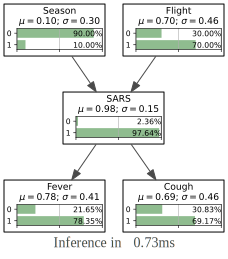

In [10]:
gnb.showInference(bn1)

In [11]:
bn1.cpt('Season')

(gum::Potential<double>@0x7f9c2f0fd3b0) <Season:0> :: 0.9 /<Season:1> :: 0.1

In [12]:
bn1.cpt('Flight')

(gum::Potential<double>@0x7f9c2f0c8a30) <Flight:0> :: 0.3 /<Flight:1> :: 0.7

In [13]:
bn1.cpt('SARS')

(gum::Potential<double>@0x7f9c30462b30) <SARS:0|Season:0|Flight:0> :: 0.03 /<SARS:1|Season:0|Flight:0> :: 0.97 /<SARS:0|Season:1|Flight:0> :: 0.05 /<SARS:1|Season:1|Flight:0> :: 0.95 /<SARS:0|Season:0|Flight:1> :: 0.02 /<SARS:1|Season:0|Flight:1> :: 0.98 /<SARS:0|Season:1|Flight:1> :: 0.02 /<SARS:1|Season:1|Flight:1> :: 0.98

In [14]:
bn1.cpt('Fever')

(gum::Potential<double>@0x7f9c2f07cbc0) <Fever:0|SARS:0> :: 0.9 /<Fever:1|SARS:0> :: 0.1 /<Fever:0|SARS:1> :: 0.2 /<Fever:1|SARS:1> :: 0.8

In [15]:
bn1.cpt('Cough')

(gum::Potential<double>@0x7f9c30438e80) <Cough:0|SARS:0> :: 0.65 /<Cough:1|SARS:0> :: 0.35 /<Cough:0|SARS:1> :: 0.3 /<Cough:1|SARS:1> :: 0.7

## Scenario 1: Probability of SARS given Fever and Cough

Severe Acute Respiratory Syndrome (SARS) is a viral illness caused by a coronavirus. During the pandemic, people became sick very often. Whether it was a common cold, flu, or covid, when someone became ill, they became filled with anxiety. Before receiving a covid test, individuals become very alarmed with the onset of symptoms. This first scenario describes the probability that an individual who experiences a cough and fever has SARS, a coronavirus induced illness.

What is the probability that and individual is diagnosed with SARS after having discovered that they have both a fever and a cough as symptoms?

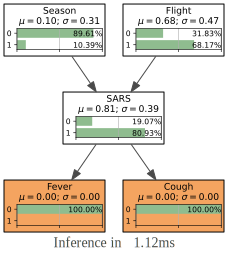

In [18]:
## 0 indicates that that it is true
evidence = {'Fever': 0, 'Cough': 0}

gnb.showInference(bn1, evs = evidence, engine=gum.LazyPropagation(bn1))

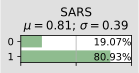

In [19]:
# calculate the updated value of prob. for SARS
gnb.showPosterior(bn1, evidence, 'SARS')

Given an individual experiences both a fever and a cough as symptoms, the probability that the individual is diagnosed with sever acute respiratory syndrome is 0.1907 or 19.07%.

## Scenario 2: Probability of SARS given Everything Has Gone Wrong

An individual is going on vacation to China. This individual booked a flight in December during christmas time. This means that the individual will not only be flying from a high-epidemic area, but also traveling during high-season. After landing back home in Canada, they begin to experience a cough. That night, the cough progressively gets worse, and they begin to burn up. Given the information above, what is the probability that the individual has contracted a coronavirus that has induced severe acute respiratory syndrome?

What is the probability of an individual having SARS if they take a flight in high season, and show sign of a cough and a fever?

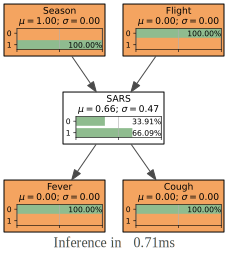

In [49]:
## true, true, high, high
evidence = {'Fever': 0, 'Cough': 0, 'Season': 1, 'Flight': 0}

gnb.showInference(bn1, evs = evidence, engine=gum.LazyPropagation(bn1))

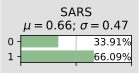

In [23]:
# calculate the updated value of prob. for SARS
gnb.showPosterior(bn1, evidence, 'SARS')

Given everything has gone wrong: it is high-epidemic season, the individual is flying from a high-epidemic area, and is experiencing both a cough and a fever, there is a probability of 0.3391 (33.91% chance) that the individual has contracted SARS. 

## Redefining the CPT for Cough as Mild, Moderate, and Severe

In [36]:
bn2 = gum.fastBN('Season->SARS<-Flight;' + 'SARS->Fever;' + 'SARS->Cough[3];')

bn2

(gum::BayesNet<double>@0x7f9c2bb5fe00) BN{nodes: 5, arcs: 4, domainSize: 48, dim: 22}

In [37]:
## cpt for Season [0 = L, 1 = H]
bn2.cpt('Season')[:] = [0.90, 0.10] 
## cpt for Flight [0 = T, 1 = F]
bn2.cpt('Flight')[:] = [0.30, 0.70] 
## cpt for SARS [0 = T, 1 = F]
bn2.cpt('SARS')[{'Season': 1, 'Flight': 0}] = [0.05, 0.95]
bn2.cpt('SARS')[{'Season': 1, 'Flight': 1}] = [0.02, 0.98]
bn2.cpt('SARS')[{'Season': 0, 'Flight': 0}] = [0.03, 0.97]
bn2.cpt('SARS')[{'Season': 0, 'Flight': 1}] = [0.02, 0.98]
## cpt for Fever [0 = T, 1 = F]
bn2.cpt('Fever')[{'SARS': 0}] = [0.90, 0.10]
bn2.cpt('Fever')[{'SARS': 1}] = [0.20, 0.80]
## cpt for Cough [0 = Mi, 1 = Mo, 2 = Se]
bn2.cpt('Cough')[{'SARS': 0}] = [0.10, 0.20, 0.70]
bn2.cpt('Cough')[{'SARS': 1}] = [0.75, 0.15, 0.10]

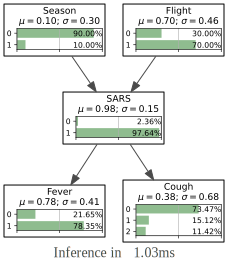

In [38]:
gnb.showInference(bn2)

In [44]:
bn2.cpt('Season')

(gum::Potential<double>@0x7f9c311dd190) <Season:0> :: 0.9 /<Season:1> :: 0.1

In [45]:
bn2.cpt('Flight')

(gum::Potential<double>@0x7f9c311de020) <Flight:0> :: 0.3 /<Flight:1> :: 0.7

In [46]:
bn2.cpt('SARS')

(gum::Potential<double>@0x7f9c311d5a50) <SARS:0|Season:0|Flight:0> :: 0.03 /<SARS:1|Season:0|Flight:0> :: 0.97 /<SARS:0|Season:1|Flight:0> :: 0.05 /<SARS:1|Season:1|Flight:0> :: 0.95 /<SARS:0|Season:0|Flight:1> :: 0.02 /<SARS:1|Season:0|Flight:1> :: 0.98 /<SARS:0|Season:1|Flight:1> :: 0.02 /<SARS:1|Season:1|Flight:1> :: 0.98

In [47]:
bn2.cpt('Fever')

(gum::Potential<double>@0x7f9c311221b0) <Fever:0|SARS:0> :: 0.9 /<Fever:1|SARS:0> :: 0.1 /<Fever:0|SARS:1> :: 0.2 /<Fever:1|SARS:1> :: 0.8

In [48]:
bn2.cpt('Cough')

(gum::Potential<double>@0x7f9c311d0000) <Cough:0|SARS:0> :: 0.1 /<Cough:1|SARS:0> :: 0.2 /<Cough:2|SARS:0> :: 0.7 /<Cough:0|SARS:1> :: 0.75 /<Cough:1|SARS:1> :: 0.15 /<Cough:2|SARS:1> :: 0.1

Cough now has 3 states and the and are labelled as follows. 0 indicated a mild cough. 1 indicates a moderate cough. 2 indicates a severe cough. If the individual is SARS positive, there is a 0.1, 0.2, and 0.7 chance that the individual will experience a mild, moderate and sever cough repsectively. If the individual is not diagnosed with SARS the individual has a 0.75, 0.15, and 0.1 chance of developing a mild, moderate or severe cough respectively. These probabilities make sense since it is more likely to develop a severe cough while having SARS, and it is more likely to develop a mild cough when you are not diagnosed with SARS.

## Scenario 1: Developed a Fever and Sever Cough While Flying From a Low-Epidemic Area during Low-Epidemic Season.

An individual goes on vacation to the arctic in the month of June. This means that it is low-epidemic season, and the individual is flying from a low-epidemic area. Two days after landing back in Canada, the individual begins to experience a fever and a severe cough. The individual begins to worry that he may have caught a coronavirus during travel and that he may have severe acute respiratory syndrome. What is the probability that the individual has contracted SARS?

What is the probability that the symptoms experienced are due to SARS even though the individual flew during low-epidemic season from a low-epidemic area?

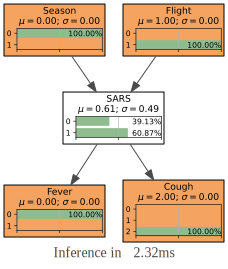

In [58]:
## true, true, high, high
evidence2 = {'Fever': 0, 'Cough': 2, 'Season': 0, 'Flight': 1}

gnb.showInference(bn2, evs = evidence2, engine=gum.LazyPropagation(bn2))

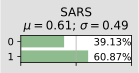

In [59]:
# calculate the updated value of prob. for SARS
gnb.showPosterior(bn2, evidence2, 'SARS')

Given it is a low-epidemic area, during low-epidemic season, with a fever and severe cough, the probability that the individual has contracted a coronavirus causing SARS is 0.3913 or 39.13%.

## Scenario 2: Developed a Sever Cough and Fever After Being diagnosed With SARS.

An individual is on a flight from an unknown country. The plane gets hijacked for part of the flight, but the criminals are overpowered and arrested upon arrival to Canada. In an attempt to identify the possible countries of origin of the flight, the government takes samples to try and identify if the country is a high-epidemic location. They choose the individual having a fever, a severe cough, and SARS. Was the origin of the flight a high-epidemic area or not?

What is the probability that the individual having SARS, with a fever and a severe cough has flown from a high-epidemic area?

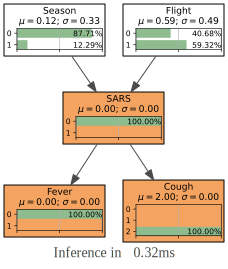

In [60]:
## true, true, high, high
evidence3 = {'SARS': 0, 'Cough': 2, 'Fever': 0}

gnb.showInference(bn2, evs = evidence3, engine=gum.LazyPropagation(bn2))

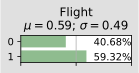

In [61]:
gnb.showPosterior(bn2, evidence3, 'Flight')

If the individual is diagnosed with SARS, and shows signs of a fever and a severe cough, the probability that this individual has taken a flight from a high-epidemic area is 0.4068 (or 40.68%). This means that although it is relatively likely they have flown from a high-epidemic area, it is more likely that it was a low-epidemic area. The government narrows down the list of possile countries and proceeds to different methods of determining the origin of the flight

## Conclusion

The pandemic was a difficult time for us all. Severe acute respiratory syndrome is a condition that increases the mortality rate of individuals who have contracted covid-19. As a result onset of any symptoms such as a fever, or coughing was worrisome. Additionally, flying was worrisome due to the sheer volume of people concentrated in a small area. This brief study models SARS using a Bayesian network. It accounts for the season, origin of flight, diagnosis of SARS, fever, and cough. With these nodes, we conducted several scenario studies addressing some of the common concerns for people during the global pandemic. Scenario 1 addressed the question: if an individual is experiencing a cough and a fever, what is the likelihood that the individual has SARS? The Bayesian network showed that with a fever and cough, there is a 19.07% chance that the individual has SARS. Scenario 2 addresses the question of what if all goes wrong, what is the likelihood that an individual has SARS. For this scenario, evidence is provided that an individual has flown from a high-epidemic area during a high-epidemic season. Additionally, the individual experiences both a cough and a fever. It is observed that while accounting for the evidence, the Bayesian network predicted a 33.91% chance that this individual has SARS. In the next step of analysis we allow cough to have three states instead of two. A cough can either be mild, moderate, or severe. The first scenario describes a circumstance where an individual flies during a low-epidemic season, from a low-epidemic area, yet experiences a severe cough and fever. The results show that the likelihood that this individual has a 39.13% chance of having SARS. The final scenario observes the results of the likelihood an individual was flying from a high-epidemic area given that they have SARS, and show signs of a severe cough and fever. The results show that given the evidence, there is a 40.68% chance that the individual flew from a high-epidemic area. To summarize the results, it appears that having a severe cough and fever is a good indicator of SARS contraction. 